# Intercellular Context Factorization with Tensor-Cell2cell
[According to the liana docs](https://liana-py.readthedocs.io/en/latest/notebooks/liana_c2c.html^)
- Developed by: Christian Eger
- Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg
- Created on: 240301
- Last modified: 240325<br>

## Importing necessary modules

In [5]:
from collections import defaultdict
import scanpy as sc
import plotnine as p9

import liana as li
import cell2cell as c2c
import decoupler as dc # needed for pathway analysis
import pickle

import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

## Reading liana results and the built Tensor from disk again

In [ ]:
adata = sc.read_h5ad("./anndata_liana.h5ad")

In [7]:
with open("./liana_tensor.pkl", "rb") as f:
    tensor = pickle.load(f)

In [8]:
sample_key = 'batch'
condition_key = 'group'
groupby = 'cell_states'

In [9]:
tensor.tensor.shape

(24, 2435, 36, 36)

## Building Metadata

In [10]:
context_dict = adata.obs[[sample_key, condition_key]].drop_duplicates()
context_dict = dict(zip(context_dict[sample_key], context_dict[condition_key]))
context_dict = defaultdict(lambda: 'Unknown', context_dict)

tensor_meta = c2c.tensor.generate_tensor_metadata(interaction_tensor=tensor,
                                                  metadata_dicts=[context_dict, None, None, None],
                                                  fill_with_order_elements=True
                                                  )

## Running Tensor-cell2cell

Running Elbow Analysis


100%|██████████| 25/25 [50:33<00:00, 121.33s/it]


The rank at the elbow is: 6
Running Tensor Factorization


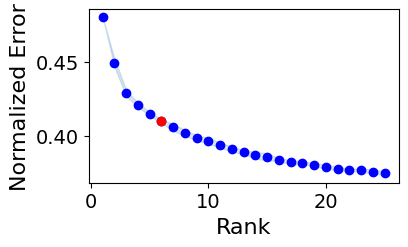

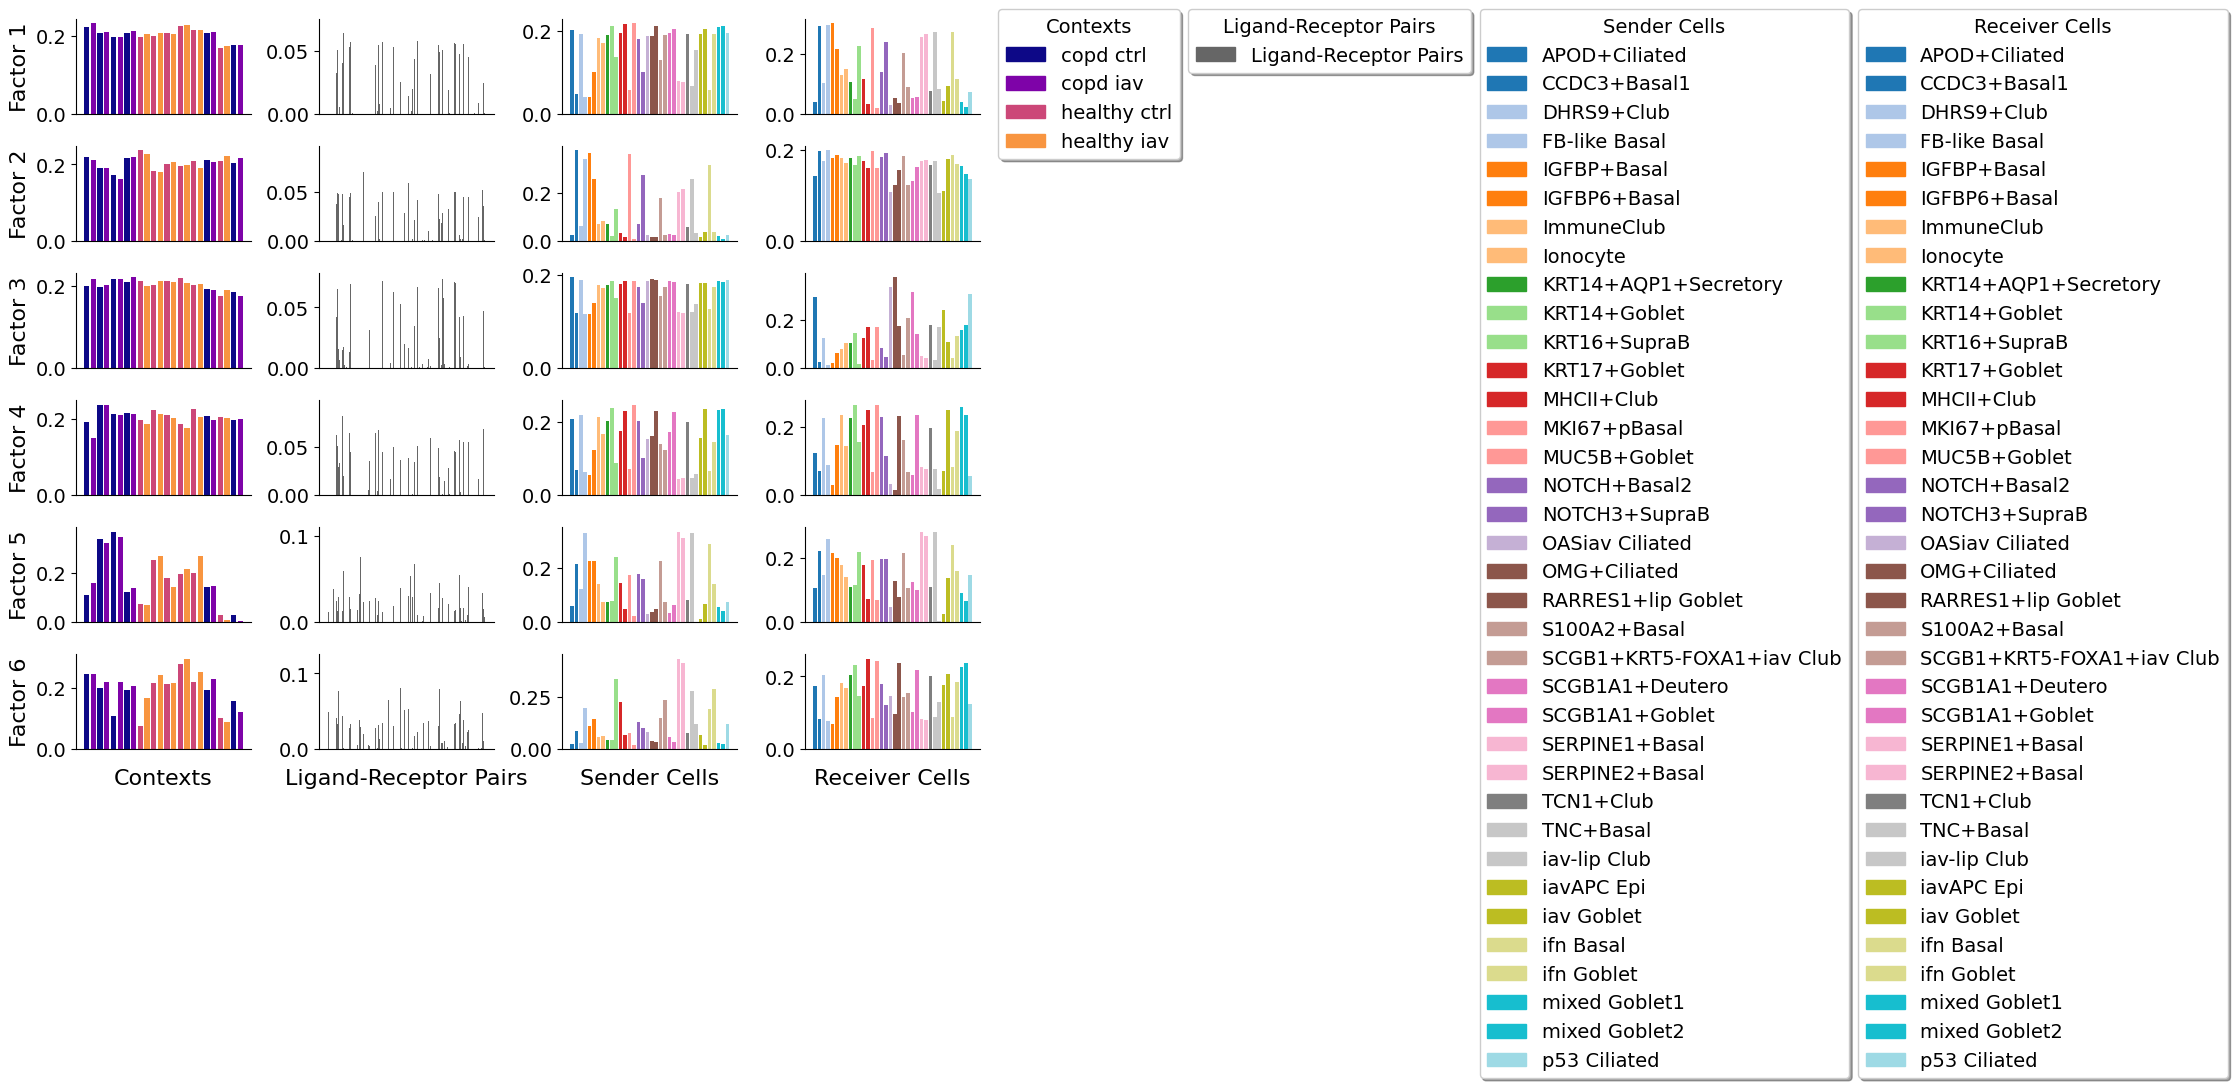

In [11]:


tensor2 = c2c.analysis.run_tensor_cell2cell_pipeline(tensor,
                                                     tensor_meta,
                                                     copy_tensor=True, # Whether to output a new tensor or modifying the original
                                                     rank=None, # Number of factors to perform the factorization. If None, it is automatically determined by an elbow analysis
                                                     tf_optimization='regular', # To define how robust we want the analysis to be.
                                                     random_state=888, # Random seed for reproducibility
                                                     backend='pytorch', # This enables a banckend that supports using a GPU.
                                                     device='cuda', # Device to use. If using GPU and PyTorch, use 'cuda'. For CPU use 'cpu'
                                                     elbow_metric='error', # Metric to use in the elbow analysis.
                                                     smooth_elbow=False, # Whether smoothing the metric of the elbow analysis.
                                                     upper_rank=25, # Max number of factors to try in the elbow analysis
                                                     tf_init='random', # Initialization method of the tensor factorization
                                                     tf_svd='numpy_svd', # Type of SVD to use if the initialization is 'svd'
                                                     cmaps=None, # Color palettes to use in color each of the dimensions. Must be a list of palettes.
                                                     sample_col='Element', # Columns containing the elements in the tensor metadata
                                                     group_col='Category', # Columns containing the major groups in the tensor metadata
                                                     fig_fontsize=14, # Fontsize of the figures generated
                                                     output_fig=True, # Whether to output the figures. If False, figures won't be saved a files if a folder was passed in output_folder.
                                                     fig_format='pdf', # File format of the figures.
                                                    )



In [7]:
df = adata.uns["liana_res"]
df.to_csv("liana_by_sample.csv")

In [8]:
df

,batch,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
0,CHE01_CTRL,SERPINE2+Basal,MUC5B+Goblet,APP,CD74,8.178089,0.0,66.191757,1.467855,2.020442,0.002653,0.901874,0.442587,0.0,0.000016,9.477697e-18
1,CHE01_CTRL,SERPINE2+Basal,mixed_Goblet2,APP,CD74,7.983547,0.0,63.332844,1.318615,1.706801,0.002538,0.899903,0.431542,0.0,0.000016,7.582152e-17
2,CHE01_CTRL,SERPINE2+Basal,KRT14+Goblet,APP,CD74,7.877275,0.0,61.771111,1.237090,1.636129,0.002475,0.898772,0.426446,0.0,0.000016,6.065714e-16
3,CHE01_CTRL,KRT17+Goblet,MUC5B+Goblet,APP,CD74,7.897637,0.0,61.138920,1.166644,1.586067,0.002450,0.898304,0.423610,0.0,0.000016,1.184709e-15
4,CHE01_CTRL,TNC+Basal,MUC5B+Goblet,APP,CD74,7.874980,0.0,60.730713,1.142311,1.659483,0.002434,0.897997,0.429901,0.0,0.000016,1.655700e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82806327,ST10_GnR_IAV,p53_Ciliated,p53_Ciliated,WNT9A,FZD2_LRP6,0.323419,1.0,0.103660,-2.156163,-4.823780,0.000023,0.262512,0.000000,1.0,1.000000,1.000000e+00
82806328,ST10_GnR_IAV,p53_Ciliated,p53_Ciliated,ZG16B,CXCR4,0.323419,1.0,0.103660,-2.156163,-4.823780,0.000023,0.262512,0.000000,1.0,1.000000,1.000000e+00
82806329,ST10_GnR_IAV,p53_Ciliated,p53_Ciliated,ZG16B,TLR6,0.323419,1.0,0.103660,-2.156163,-4.823780,0.000023,0.262512,0.000000,1.0,1.000000,1.000000e+00
82806330,ST10_GnR_IAV,p53_Ciliated,p53_Ciliated,ZP3,CHRNA7,0.323419,1.0,0.103660,-2.156163,-4.823780,0.000023,0.262512,0.000000,1.0,1.000000,1.000000e+00


In [12]:
c2c.io.export_variable_with_pickle(tensor2, "liana_tensor_2.pkl")

liana_tensor_2.pkl  was correctly saved.


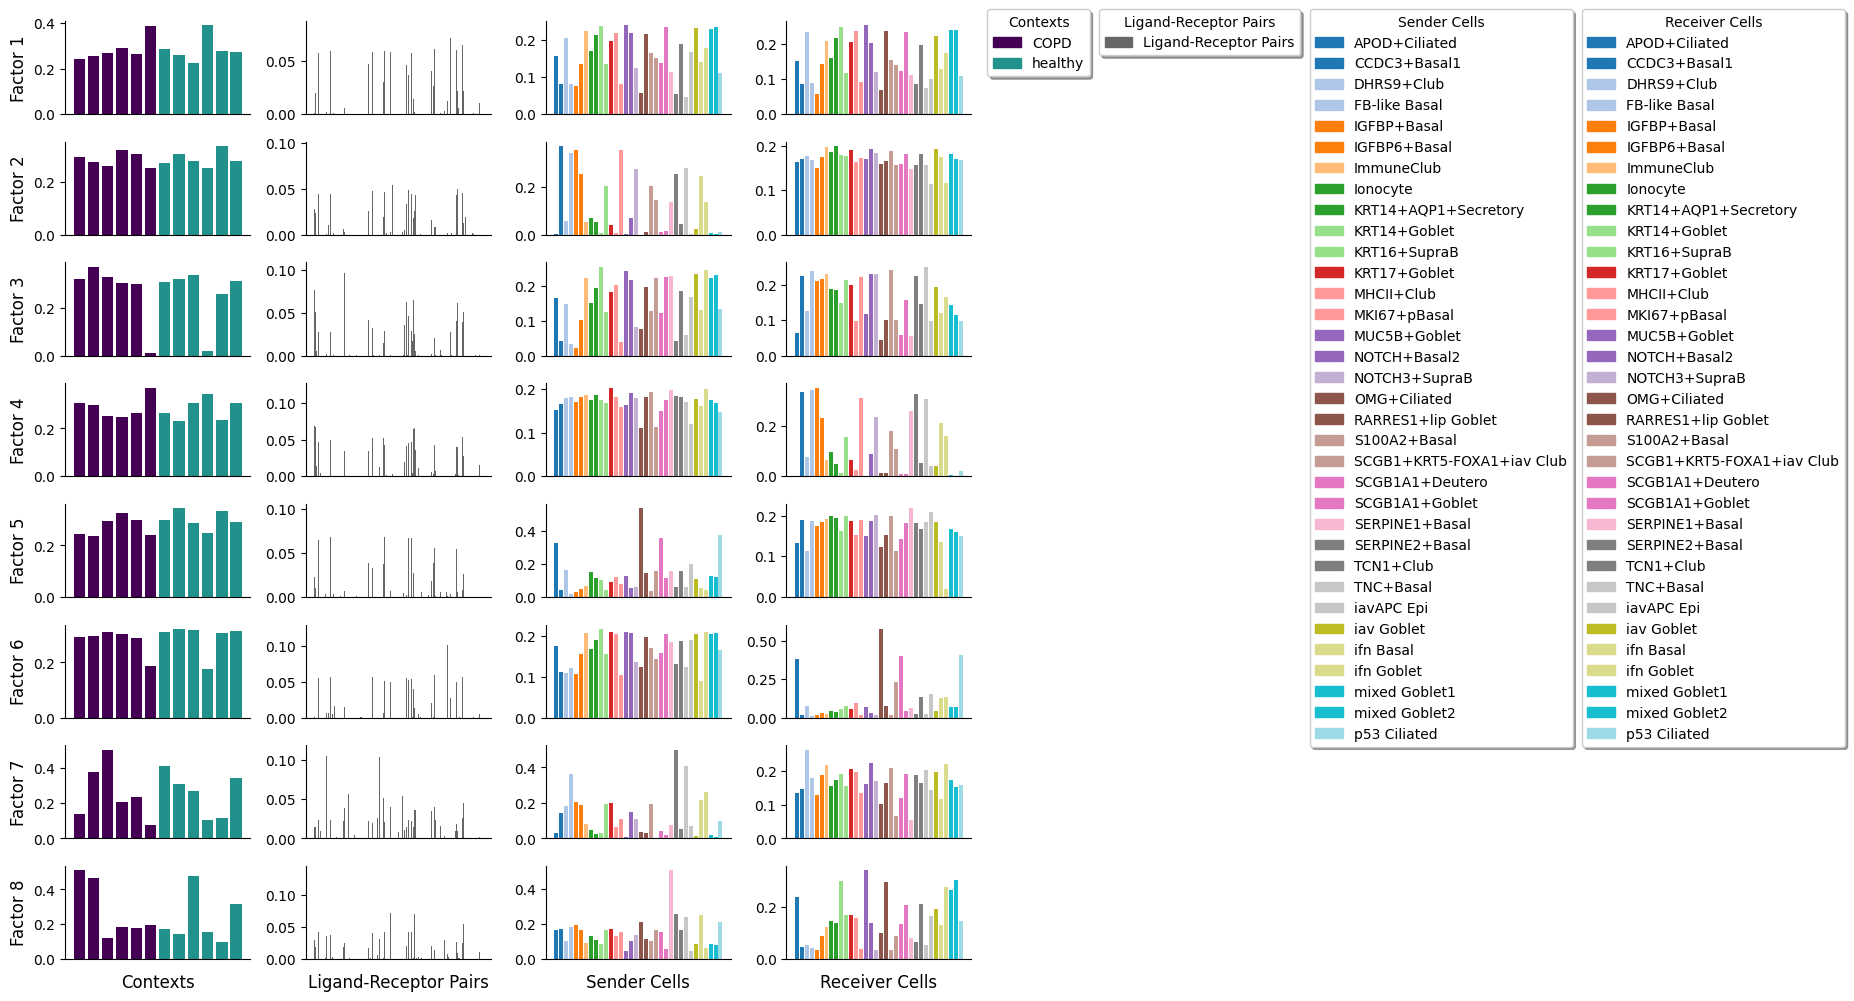

In [17]:
factors, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=tensor2,
                                                 metadata = tensor_meta, # This is the metadata for each dimension
                                                 sample_col='Element',
                                                 group_col='Category',
                                                 meta_cmaps = ['viridis', 'Dark2_r', 'tab20', 'tab20'],
                                                 fontsize=10, # Font size of the figures generated
                                                 )

In [21]:
factors = tensor2.factors

In [23]:
factors.keys()

odict_keys(['Contexts', 'Ligand-Receptor Pairs', 'Sender Cells', 'Receiver Cells'])

In [67]:
factors["Sender Cells"]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
Sender Cells,,,,,,,,
APOD+Ciliated,0.156382,0.002947,0.166502,0.151185,0.325684,0.175516,0.030893,0.164081
CCDC3+Basal1,0.082359,0.367779,0.040965,0.164088,0.043929,0.110717,0.142177,0.172607
DHRS9+Club,0.204787,0.056375,0.148513,0.178069,0.164985,0.108180,0.181586,0.101541
FB-like_Basal,0.079887,0.337603,0.033749,0.180758,0.016995,0.122338,0.364252,0.182909
IGFBP+Basal,0.074754,0.352350,0.022891,0.169047,0.032278,0.106632,0.203016,0.191414
IGFBP6+Basal,0.136276,0.250948,0.101362,0.181532,0.050708,0.155125,0.189769,0.166776
ImmuneClub,0.223830,0.055170,0.223890,0.186843,0.067363,0.205632,0.082069,0.093578
Ionocyte,0.168788,0.071744,0.150787,0.174515,0.148334,0.168545,0.047418,0.133457
KRT14+AQP1+Secretory,0.213404,0.052633,0.195258,0.185834,0.112877,0.190770,0.024248,0.108780


In [24]:
factors['Contexts']



,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
CHE-01,0.242876,0.297032,0.317845,0.307043,0.244710,0.291791,0.138325,0.508180
CHE-02,0.255888,0.277803,0.369638,0.298156,0.237876,0.295618,0.376838,0.463786
CHE-03,0.267687,0.261983,0.329099,0.253766,0.294233,0.308896,0.504590,0.119293
CSE-03,0.288485,0.321897,0.300909,0.248811,0.324675,0.302298,0.206350,0.181970
CSE-06,0.264751,0.307692,0.298806,0.262763,0.299008,0.289418,0.237244,0.178535
CSE-07,0.388408,0.252935,0.009592,0.371027,0.238498,0.186245,0.075993,0.196319
GER-02,0.283769,0.272660,0.306941,0.263814,0.299740,0.310663,0.411395,0.169891
GER-12,0.259271,0.308747,0.320163,0.229437,0.343494,0.320747,0.311320,0.141204
GER-14,0.225861,0.279128,0.335709,0.304440,0.285523,0.316609,0.266938,0.476223
GNR-06,0.388956,0.252835,0.017931,0.345685,0.247200,0.176141,0.103397,0.157670


In [58]:
range(tensor2.rank)

range(0, 8)

In [60]:


for i in range(tensor2.rank):
        print(tensor2.get_top_factor_elements(order_name='Ligand-Receptor Pairs', 
                                             factor_name='Factor {}'.format(i+1), 
                                             top_number=10))
        print('')


APP^TSPAN12        0.083381
ADAM10^TSPAN12     0.083137
C3^IFITM1          0.077436
TF^LDLR            0.073636
CEACAM6^CEACAM1    0.073095
HMGB1^TLR2         0.072922
S100A9^TLR4        0.072488
NECTIN1^NECTIN4    0.072091
TF^ADRB2           0.071930
CGN^OCLN           0.071291
Name: Factor 1, dtype: float32

BMP7^ACTR2          0.096856
WNT10A^FZD6_LRP5    0.091646
WNT10A^FZD6_LRP6    0.087609
BMP7^PTPRK          0.084207
TIMP3^MET           0.082985
WNT10A^FZD3_LRP5    0.081397
BMP7^ACVR1_BMPR2    0.080526
ECM1^ITGB4          0.079797
LYPD3^AGR2          0.078650
WNT10A^FZD3_LRP6    0.078171
Name: Factor 2, dtype: float32

COL1A1^ITGA2_ITGB1    0.103570
COL1A1^ITGAV_ITGB8    0.099671
COL1A1^ITGA3_ITGB1    0.098118
COL1A1^CD44           0.096671
HSPG2^ITGA2           0.093548
COL4A5^ITGA3_ITGB1    0.089164
HSPG2^DAG1            0.086901
COL4A5^ITGAV_ITGB8    0.086840
SEMA3A^NRP1_PLXNA2    0.086485
COL4A5^ITGA2_ITGB1    0.085324
Name: Factor 3, dtype: float32

LGALS3^MCAM    0.120729


In [66]:
lr_loadings = factors['Ligand-Receptor Pairs']
lr_loadings.sort_values("Factor 2", ascending=False)



,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
BMP7^ACTR2,7.949605e-05,9.685563e-02,5.619149e-07,3.364484e-03,4.196468e-06,4.526902e-05,3.575272e-03,9.622816e-04
WNT10A^FZD6_LRP5,9.454623e-10,9.164573e-02,3.542186e-12,2.630651e-03,1.911534e-10,6.146220e-09,1.229386e-02,7.365622e-03
WNT10A^FZD6_LRP6,5.873985e-10,8.760854e-02,5.746758e-11,8.607394e-04,3.629759e-10,3.773247e-08,1.822050e-02,4.788420e-03
BMP7^PTPRK,7.461448e-09,8.420679e-02,2.256582e-10,8.420162e-05,7.176916e-10,1.272908e-07,6.582682e-04,1.030092e-05
TIMP3^MET,8.858603e-03,8.298529e-02,2.264493e-03,2.212802e-02,6.701514e-05,1.698443e-03,1.346793e-02,6.059192e-02
...,...,...,...,...,...,...,...,...
COL9A3^CD44,3.350294e-13,3.363116e-44,1.174221e-39,8.574347e-05,6.699449e-05,2.168176e-18,6.947927e-36,6.777704e-15
COL9A3^ITGA2_ITGB1,5.923179e-07,9.809089e-45,5.907909e-37,7.432301e-06,1.383222e-06,3.415229e-10,2.538595e-35,4.154735e-06
COL9A3^ITGAV_ITGB8,4.283154e-17,7.006492e-45,9.111957e-40,7.383377e-06,6.027555e-06,1.824935e-21,5.332129e-37,4.117775e-17
COL9A3^ITGA3_ITGB1,2.174375e-14,4.203895e-45,2.007233e-39,2.524667e-05,1.800245e-05,7.368359e-20,1.094418e-36,1.913272e-15


In [64]:
tensor2.export_factor_loadings('Loadings.xlsx')

Loadings of the tensor factorization were successfully saved into Loadings.xlsx


In [27]:
# load PROGENy pathways
net = dc.get_progeny(organism='human', top=5000)

39.0MB [00:00, 65.8MB/s]


In [52]:
# load full list of ligand-receptor pairs
lr_pairs = li.resource.select_resource('consensus')



AttributeError: module 'liana' has no attribute 'resource'

In [33]:
li.mt.rank_aggregate()

TypeError: AggregateClass.__call__() missing 2 required positional arguments: 'adata' and 'groupby'

In [40]:


boxplot = c2c.plotting.factor_plot.context_boxplot(factors['Contexts'],
                                                   metadict=context_dict,
                                                   nrows=2,
                                                   figsize=(12, 6),
                                                   group_order=['ASD', 'Control'],
                                                   statistical_test='t-test_ind',
                                                   pval_correction='bonferroni',
                                                   cmap='viridis',
                                                   verbose=False,
                                                  )


TypeError: context_boxplot() missing 1 required positional argument: 'metadict'

In [54]:
c2c.analysis.tensor_downstream.compute_gini_coefficients(factors,
                                                         sender_label='Sender Cells',
                                                         receiver_label='Receiver Cells'
                                                        ).sort_values("Gini")

,Factor,Gini
0,Factor 1,0.314271
2,Factor 3,0.356817
4,Factor 5,0.430136
7,Factor 8,0.430965
6,Factor 7,0.526765
3,Factor 4,0.540528
5,Factor 6,0.567135
1,Factor 2,0.570038


In [45]:
factors

OrderedDict([('Contexts',
                      Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  \
              CHE-01  0.242876  0.297032  0.317845  0.307043  0.244710  0.291791  0.138325   
              CHE-02  0.255888  0.277803  0.369638  0.298156  0.237876  0.295618  0.376838   
              CHE-03  0.267687  0.261983  0.329099  0.253766  0.294233  0.308896  0.504590   
              CSE-03  0.288485  0.321897  0.300909  0.248811  0.324675  0.302298  0.206350   
              CSE-06  0.264751  0.307692  0.298806  0.262763  0.299008  0.289418  0.237244   
              CSE-07  0.388408  0.252935  0.009592  0.371027  0.238498  0.186245  0.075993   
              GER-02  0.283769  0.272660  0.306941  0.263814  0.299740  0.310663  0.411395   
              GER-12  0.259271  0.308747  0.320163  0.229437  0.343494  0.320747  0.311320   
              GER-14  0.225861  0.279128  0.335709  0.304440  0.285523  0.316609  0.266938   
              GNR-06  0.388956  0.

(<Figure size 3200x1600 with 2 Axes>,
 array([<Axes: title={'center': 'Factor 2'}>,
        <Axes: title={'center': 'Factor 8'}>], dtype=object))

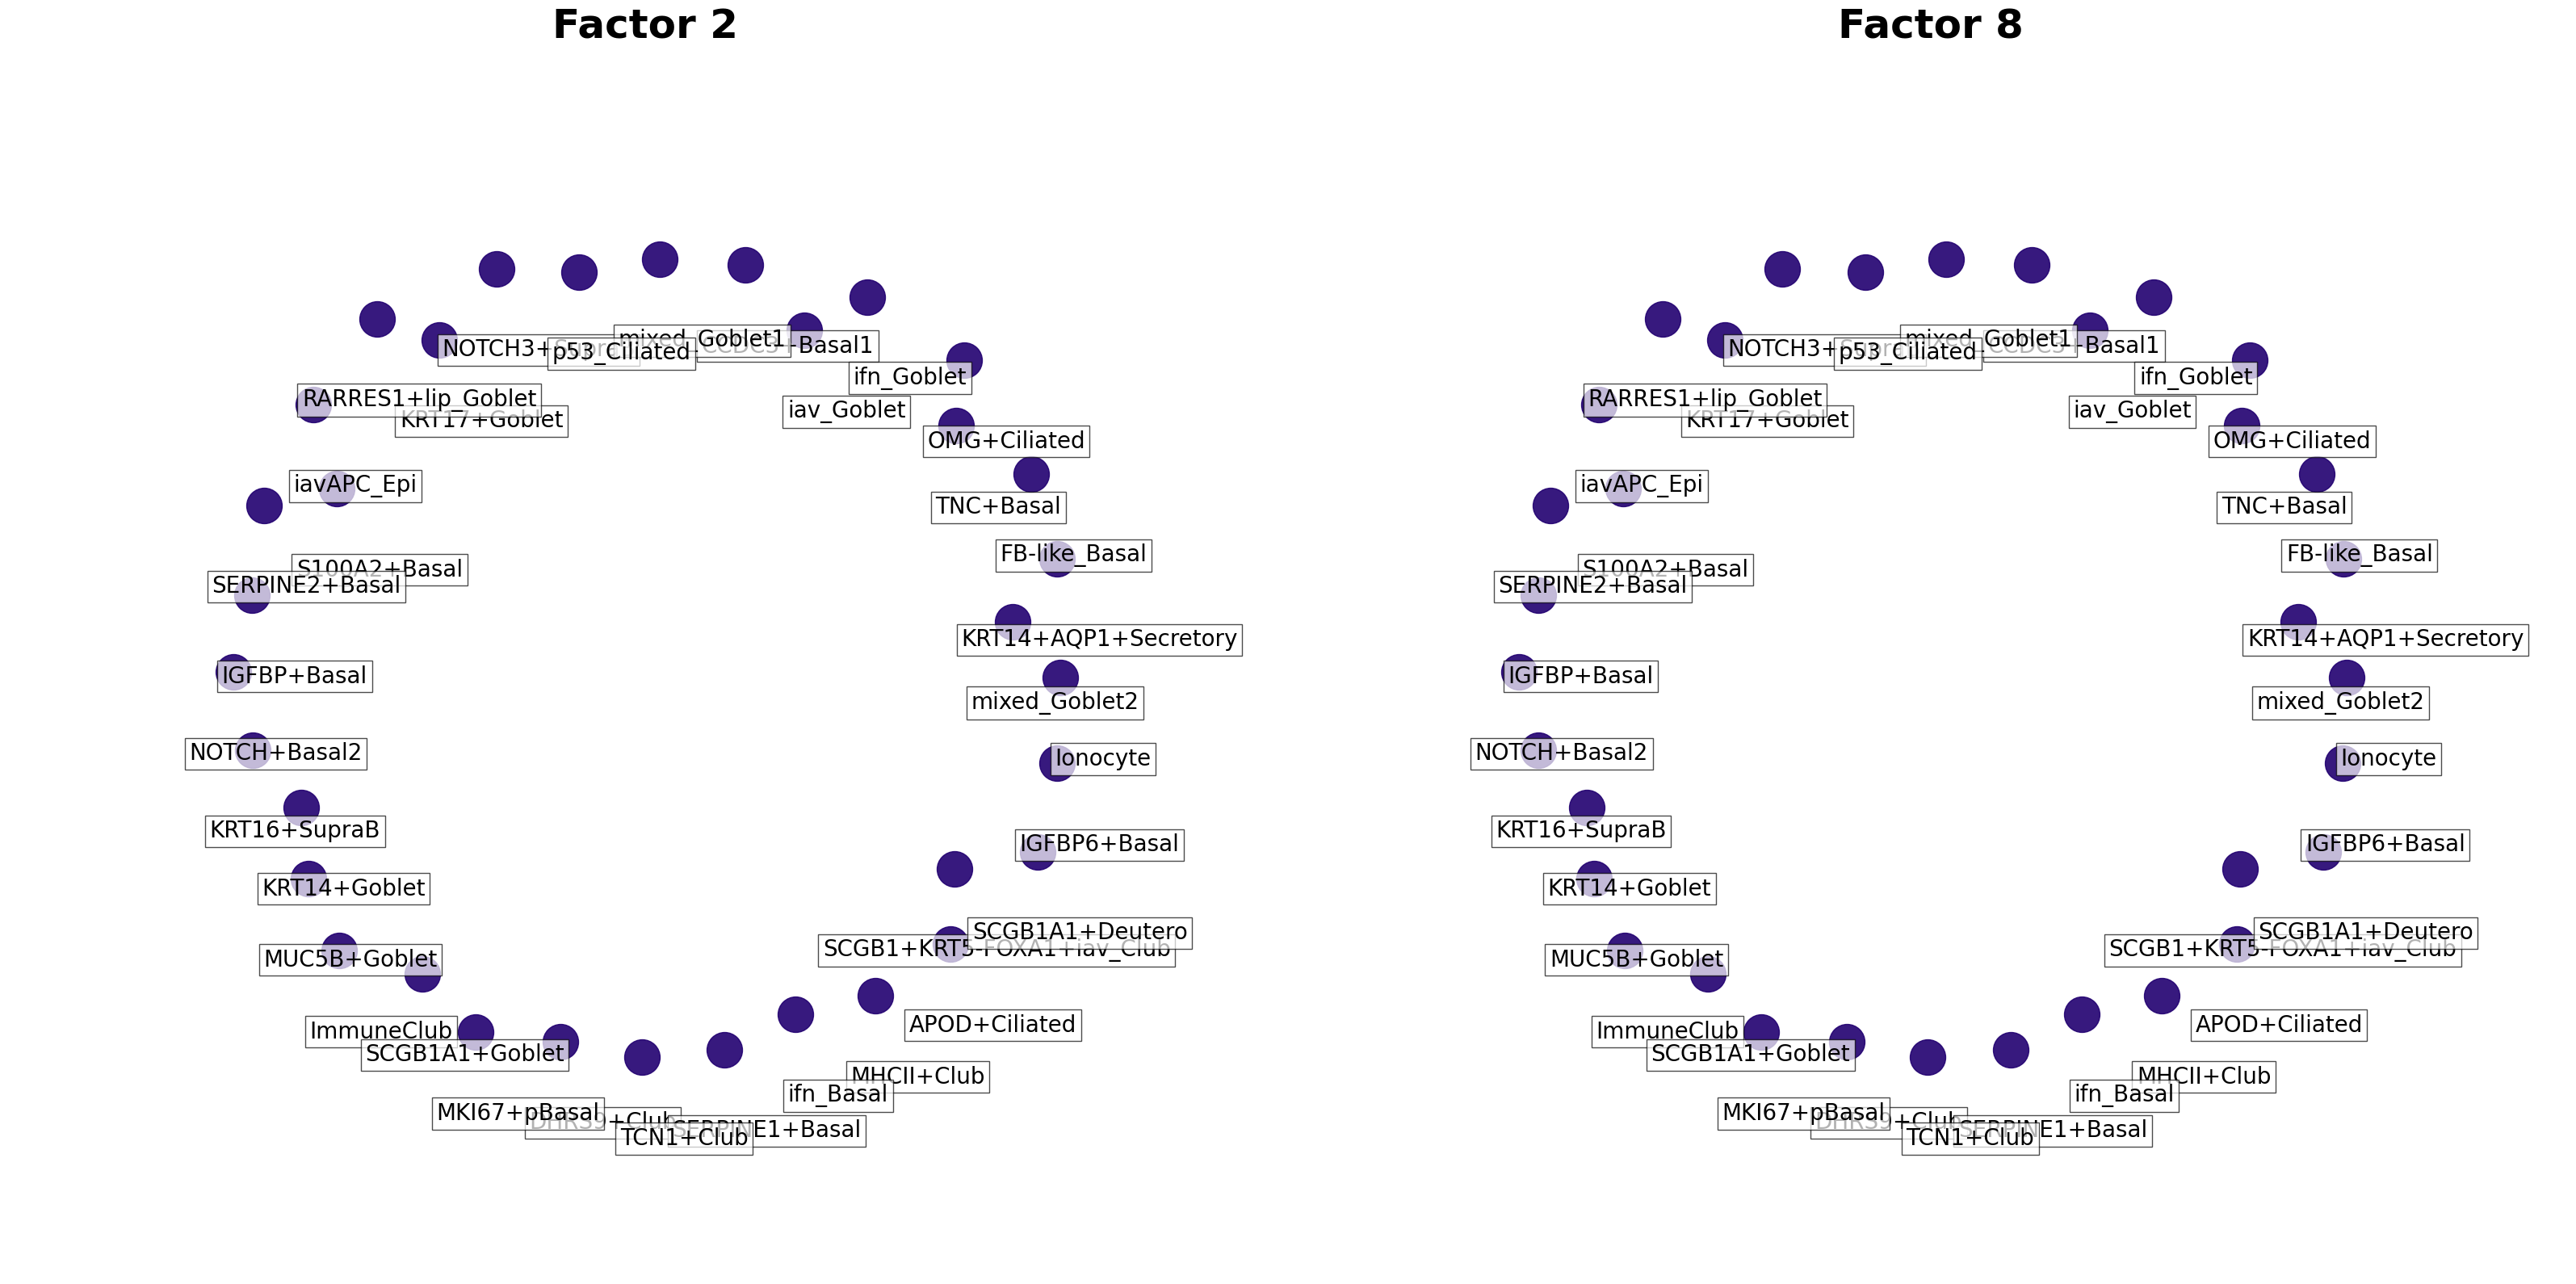

In [51]:


c2c.plotting.ccc_networks_plot(factors,
                               included_factors=['Factor 2', 'Factor 8'],
                               ccc_threshold=2.0, # Only important communication
                               nrows=1,
                               panel_size=(16, 16), # This changes the size of each figure panel.
                              )
